### **Objective:** 

The aim of this study is to find confirmed exoplanet stars using change in flux (light intensity) of several thousand stars.

### **Data:**

### **The Search for New Earths**

The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems. As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.

### **Data description:**

Trainset:
5087 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
37 confirmed exoplanet-stars and 5050 non-exoplanet-stars.

Testset:
570 rows or observations.
3198 columns or features.
Column 1 is the label vector. Columns 2 - 3198 are the flux values over time.
5 confirmed exoplanet-stars and 565 non-exoplanet-stars.

### **Data analysis:**

Data analysis involves the following steps.

1. Data understanding.
2. Exploratory data analysis.
3. Model building.


In [73]:
# Load the following libraries.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.compat.v1 import set_random_seed
from imblearn.over_sampling import SMOTE
from scipy import ndimage

In [74]:
# Load the train and test data.

test_dir = "/kaggle/input/kepler-labelled-time-series-data/exoTest.csv"

train_dir = "/kaggle/input/kepler-labelled-time-series-data/exoTrain.csv"

train = pd.read_csv(train_dir)

test = pd.read_csv(test_dir)

In [75]:
# Let's see how train data looks like.

train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [76]:
# Let's see how test data looks like.

test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [77]:
# Making variable "LABEL" binary.

categ = {2: 1,1: 0}

train.LABEL = [categ[item] for item in train.LABEL]

test.LABEL = [categ[item] for item in test.LABEL]

In [78]:
# Check value counts of "LABEL".

train['LABEL'].value_counts()

# Data is highly imbalanced.
# It contains 37 confirmed exoplanet-stars and 5050 non-confirmed exoplanet-stars.

0    5050
1      37
Name: LABEL, dtype: int64

### **Exploratory Data Analysis.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)')

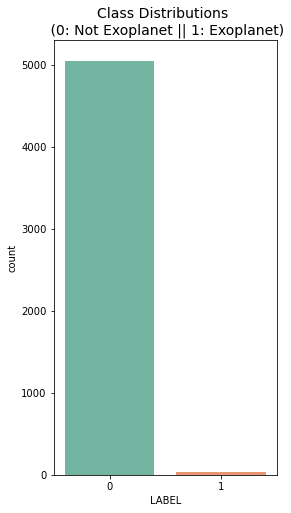

In [79]:
# Visualizing class distribution.

plt.figure(figsize = (4,8))

colors = ["0", "1"]

sns.countplot('LABEL', data = train, palette = "Set2")

plt.title('Class Distributions \n (0: Not Exoplanet || 1: Exoplanet)', fontsize = 14)

# Data has more non-confirmed-exoplanet-stars.

In [80]:
# Functions to plot flux graph.

def flux_graph(dataset, row, dataframe, planet):
    if dataframe:
        fig = plt.figure(figsize = (20,5), facecolor = (.18, .31, .31))
        ax = fig.add_subplot()
        ax.set_facecolor('#004d4d')
        ax.set_title(planet, color = 'white', fontsize = 22)
        ax.set_xlabel('time', color = 'white', fontsize = 18)
        ax.set_ylabel('flux_' + str(row), color = 'white', fontsize = 18)
        ax.grid(False)
        flux_time = list(dataset.columns)
        flux_values = dataset[flux_time].iloc[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, '#00ffff')
        ax.tick_params(colors = 'black', labelcolor = '#00ffff', labelsize = 14)
        plt.show()
    else:
        fig = plt.figure(figsize = (20,5), facecolor = (.18, .31, .31))
        ax = fig.add_subplot()
        ax.set_facecolor('#004d4d')
        ax.set_title(planet, color = 'white', fontsize = 22)
        ax.set_xlabel('time', color = 'white', fontsize = 18)
        ax.set_ylabel('flux_' + str(row), color = 'white', fontsize = 18)
        ax.grid(False)
        flux_values = dataset[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, '#00ffff')
        ax.tick_params(colors = 'black', labelcolor = '#00ffff', labelsize = 14)
        plt.show()
        
def show_graph(dataframe, dataset):
    with_planet = train[train['LABEL'] == 1].head(3).index
    without_planet = train[train['LABEL'] == 0].head(3).index

    for row in with_planet:
        flux_graph(dataset, row, dataframe, planet = 'with_planet')
    for row in without_planet:
        flux_graph(dataset, row, dataframe, planet = 'without_planet')

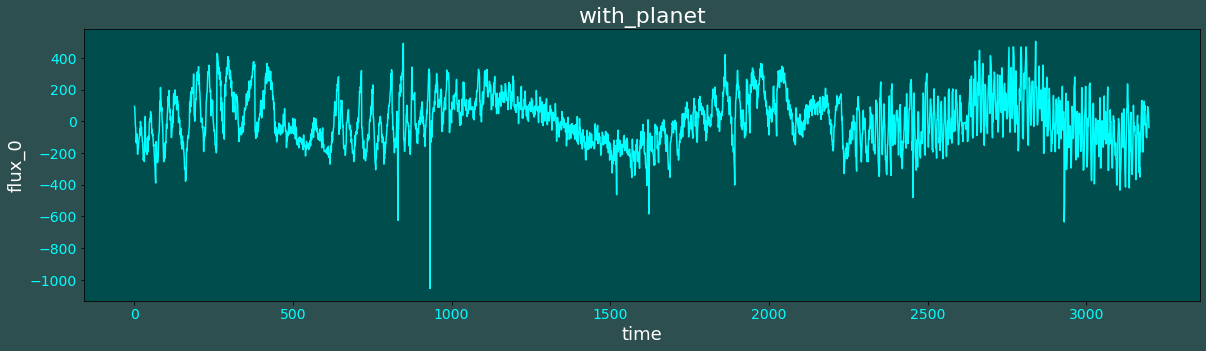

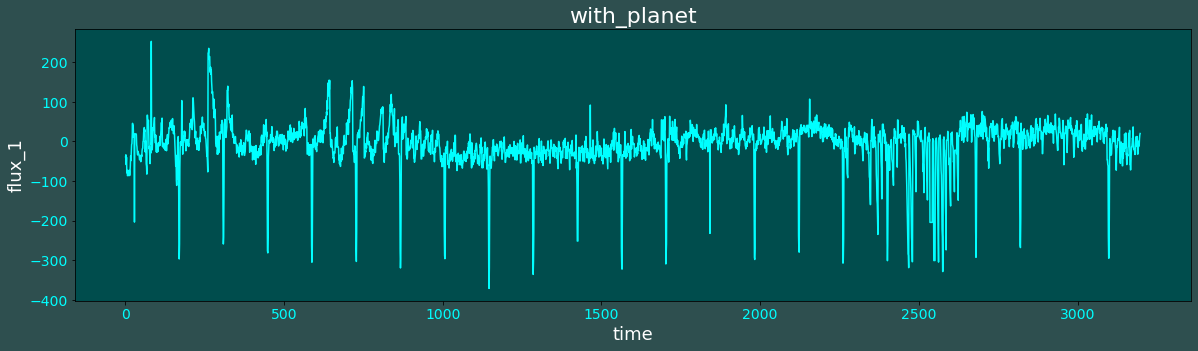

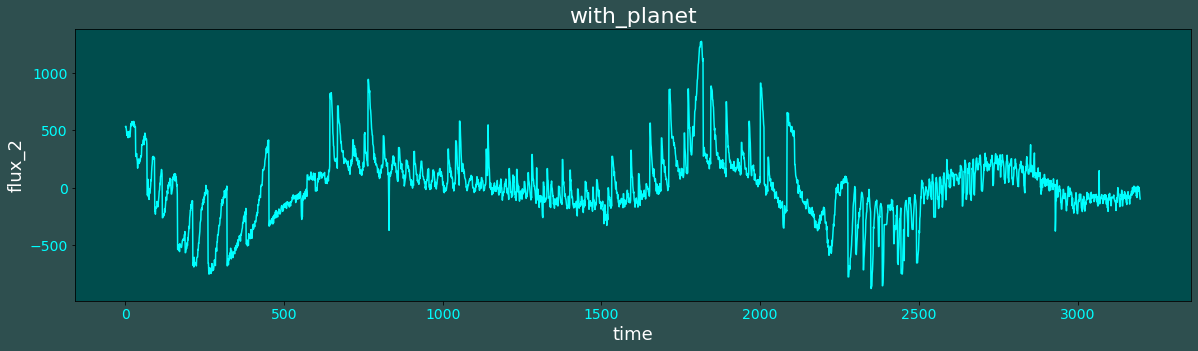

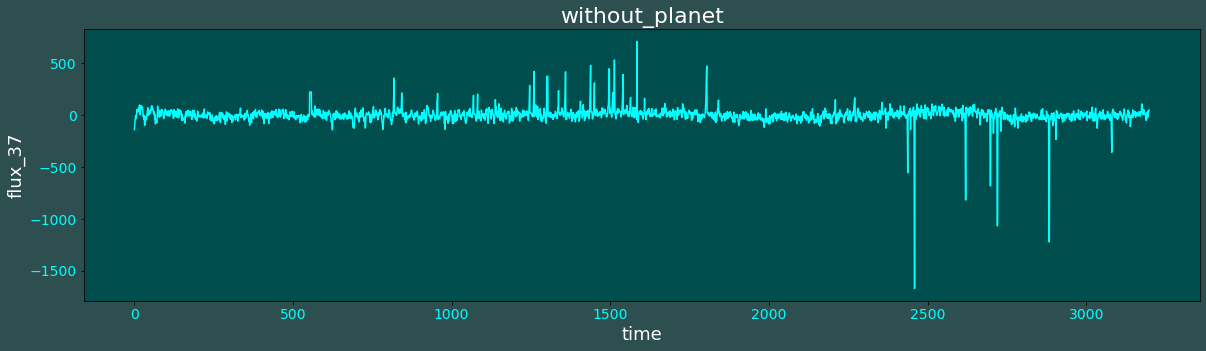

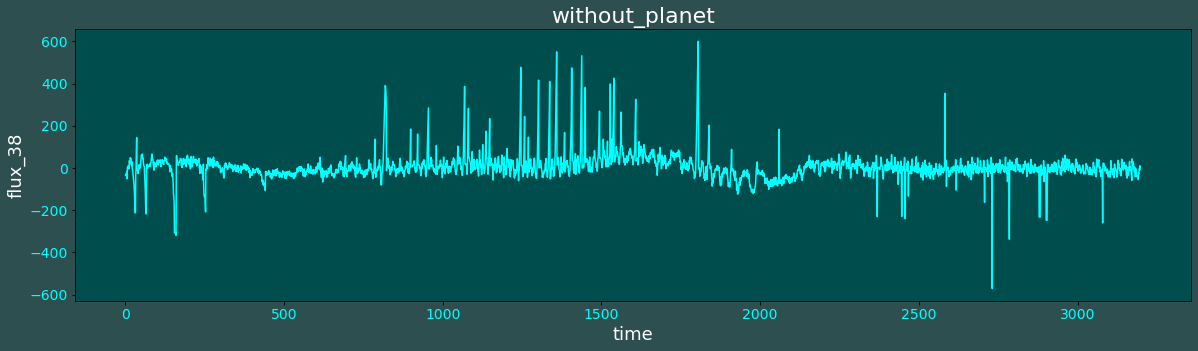

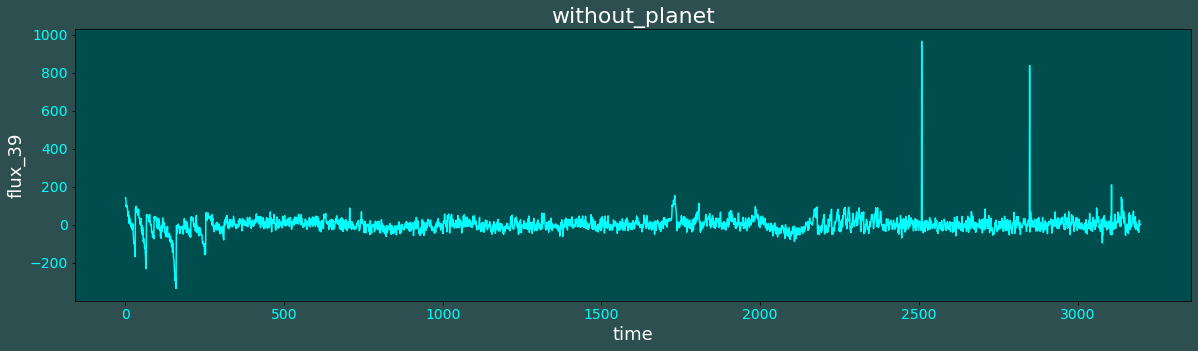

In [81]:
# Plotting flux graph.

show_graph(True, dataset = train.loc[:, train.columns != 'LABEL'])

### **Outlier treatment**

In [82]:
# Extracting only numeric columns from train.

numeric_cols = train.select_dtypes(include = 'number')

numeric_cols_t = test.select_dtypes(include = 'number')

In [83]:
# Dropping column "LABEL".

numeric_cols.drop(["LABEL"], axis = 1, inplace = True)

numeric_cols_t.drop(["LABEL"], axis = 1, inplace = True)

In [84]:
# Extracting first few columns of numeric_cols dataframe to check for outliers.

cols = numeric_cols.iloc[:, 0:5]

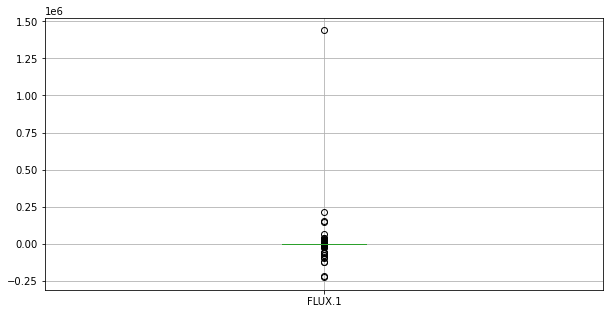

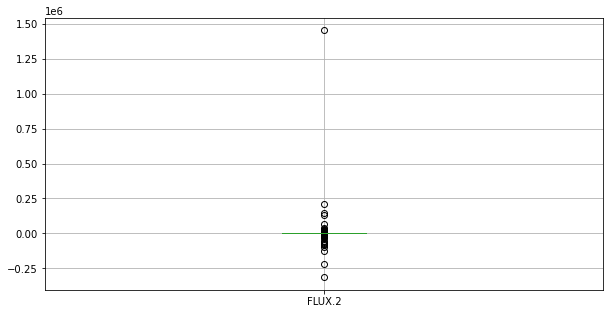

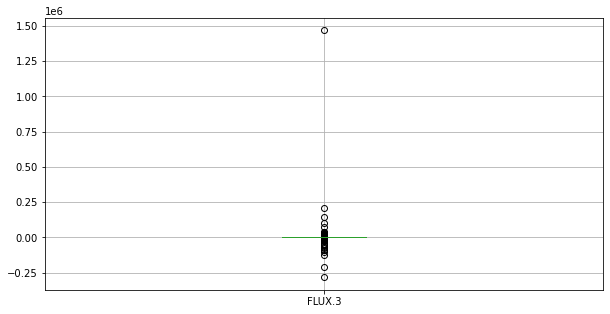

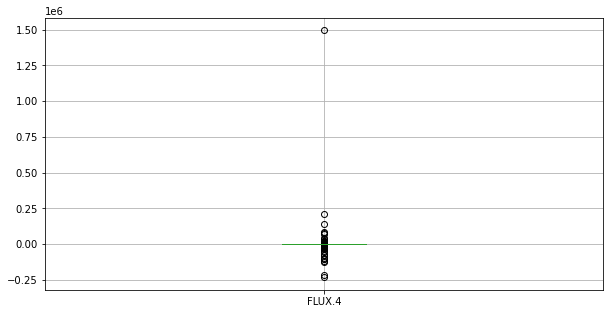

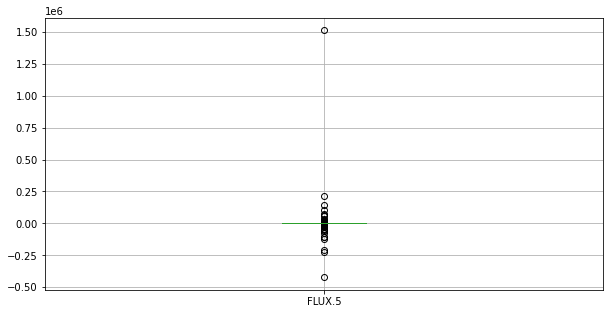

In [85]:
# Plotting boxplots for continous variables in order to detect outliers.

for column in cols:
    plt.figure(figsize = (10,5))
    cols.boxplot([column])
    
# Some variables have outliers. These outliers will be treated in the next step.

In [86]:
# Flooring and capping ouliers in train data.

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    numeric_cols[col][numeric_cols[col] <= Lower_cap] = Lower_cap
    numeric_cols[col][numeric_cols[col] >= Upper_cap] = Upper_cap

In [87]:
# Flooring and capping ouliers in test data.

for col in numeric_cols_t.columns:
    Q1 = numeric_cols_t[col].quantile(0.25)
    Q3 = numeric_cols_t[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    numeric_cols_t[col][numeric_cols_t[col] <= Lower_cap] = Lower_cap
    numeric_cols_t[col][numeric_cols_t[col] >= Upper_cap] = Upper_cap

In [88]:
# Dropping all columns except "LABEL".

train.drop(train.columns.difference(['LABEL']), 1, inplace = True)

test.drop(test.columns.difference(['LABEL']), 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [89]:
# Setting indices.

numeric_cols.reset_index(drop = True, inplace = True)

train.reset_index(drop = True, inplace = True)

numeric_cols_t.reset_index(drop = True, inplace = True)

test.reset_index(drop = True, inplace = True)

In [90]:
# Train data after outlier treatment.

train = pd.concat([train, numeric_cols], axis = 1)

In [91]:
# Test data after outlier treatment.

test = pd.concat([test, numeric_cols_t], axis = 1)

In [92]:
# Storing independent variables and target variable of train data in "X" and "Y" respectively.

X = train.drop(["LABEL"],axis = 1)

Y = train["LABEL"] 

### **Data normalization**

In [93]:
# Normalizing train and data.

X = normalize(X)

### **Apply gaussian filters**

In [94]:
# Applying Gaussian filters.

X = ndimage.filters.gaussian_filter(X, sigma = 10)

In [95]:
# Scaling train data.

# Define standard scaler.

scaler = StandardScaler()

# Transform data.

scaled = scaler.fit_transform(X)

print(scaled)

[[ 0.40925876  0.40607483  0.39977075 ... -1.31769223 -1.30824896
  -1.30346011]
 [ 0.40363518  0.40046357  0.39418456 ... -1.30578167 -1.29632947
  -1.29153601]
 [ 0.39265498  0.38950533  0.3832711  ... -1.28222409 -1.27275419
  -1.2679516 ]
 ...
 [ 2.19875841  2.19863398  2.19836159 ... -0.92611593 -0.9345727
  -0.93887725]
 [ 2.24014113  2.24004507  2.23982689 ... -0.89599048 -0.90442667
  -0.90872088]
 [ 2.26105512  2.26097287  2.26078101 ... -0.88083    -0.88925561
  -0.89354448]]


In [96]:
# Creating train and test split.

x_train, x_test, y_train, y_test = train_test_split(scaled, Y, test_size = 0.30, random_state = 42)

### **Balancing "LABEL"**

In [97]:
# Applying SMOTE to deal with class imbalance.

sm = SMOTE(random_state = 42)

X_res, y_res = sm.fit_resample(x_train, y_train)

In [98]:
# Checking if classes are balanced.

y_res.value_counts()

0    3535
1    3535
Name: LABEL, dtype: int64

### **Model Building**

In [99]:
# Reshaping data to fit neural networks.

X_train1 = X_res.reshape(X_res.shape[0] , X_res.shape[1] , 1)

X_test1 = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [100]:
# Vectorized labels.

train_label = np.asarray(y_res).astype('float32').reshape((-1,1))

test_label = np.asarray(y_test).astype('float32').reshape((-1,1))

In [101]:
# Setting seed.

set_random_seed(42)

### **Gated Recurrent Unit (GRU) Classifier**

In [107]:
# Building GRU model.

model = Sequential()
model.add(GRU(units = 50, return_sequences = True, input_shape = (X_train1.shape[1],1), activation = 'tanh'))
model.add(Dropout(0.3))
model.add(GRU(units = 50, return_sequences = True, input_shape = (X_train1.shape[1],1), activation = 'tanh'))
model.add(Dropout(0.3))
model.add(GRU(units = 50, return_sequences = True, input_shape = (X_train1.shape[1],1), activation = 'tanh'))
model.add(Dropout(0.3))
model.add(GRU(units = 50, activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = False), loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [108]:
# Printing model summary.

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 3197, 50)          7950      
_________________________________________________________________
dropout_10 (Dropout)         (None, 3197, 50)          0         
_________________________________________________________________
gru_5 (GRU)                  (None, 3197, 50)          15300     
_________________________________________________________________
dropout_11 (Dropout)         (None, 3197, 50)          0         
_________________________________________________________________
gru_6 (GRU)                  (None, 3197, 50)          15300     
_________________________________________________________________
dropout_12 (Dropout)         (None, 3197, 50)          0         
_________________________________________________________________
gru_7 (GRU)                  (None, 50)               

In [109]:
# Fitting the model.

model.fit(X_train1, train_label, validation_data = (X_test1,test_label), epochs = 50, batch_size = 75, shuffle = True, callbacks = [early_stop])

Epoch 1/50
95/95 [==============================] - 44s 407ms/step - loss: 0.5271 - accuracy: 0.7789 - val_loss: 0.6096 - val_accuracy: 0.6778
Epoch 2/50
95/95 [==============================] - 38s 397ms/step - loss: 0.4195 - accuracy: 0.8274 - val_loss: 0.4758 - val_accuracy: 0.6942
Epoch 3/50
95/95 [==============================] - 39s 408ms/step - loss: 0.3542 - accuracy: 0.8598 - val_loss: 0.4983 - val_accuracy: 0.7027
Epoch 4/50
95/95 [==============================] - 37s 395ms/step - loss: 0.3350 - accuracy: 0.8687 - val_loss: 0.5092 - val_accuracy: 0.6955
Epoch 5/50
95/95 [==============================] - 38s 398ms/step - loss: 0.3215 - accuracy: 0.8754 - val_loss: 0.4717 - val_accuracy: 0.7387
Epoch 6/50
95/95 [==============================] - 38s 397ms/step - loss: 0.3089 - accuracy: 0.8873 - val_loss: 0.3892 - val_accuracy: 0.7917
Epoch 7/50
95/95 [==============================] - 38s 396ms/step - loss: 0.3097 - accuracy: 0.8901 - val_loss: 0.4074 - val_accuracy: 0.7983

In [110]:
# Predicting test data.

y_pred = model.predict(X_test1)
y_pred = np.round(y_pred).astype(int)

In [111]:
# Calculating accuracy and F1 score.

print("Accuracy of GRU model on test data : " , model.evaluate(X_test1,y_test)[1]*100 , "%")

print(classification_report(y_test, y_pred))

# Calculating f1_score.

print(f1_score(y_test,y_pred, average = 'binary'))  

48/48 [==============================] - 8s 142ms/step - loss: 0.3892 - accuracy: 0.7917
Accuracy of GRU model on test data :  79.17485237121582 %
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1515
           1       0.04      1.00      0.07        12

    accuracy                           0.79      1527
   macro avg       0.52      0.90      0.48      1527
weighted avg       0.99      0.79      0.88      1527

0.07017543859649122


### **Long Short Term Memory (LSTM) model**

In [112]:
# Building LSTM model.

model = Sequential()
model.add(LSTM(70,return_sequences = True,input_shape = (X_train1.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(60))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

In [113]:
# Printing model summary.

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3197, 70)          20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 3197, 50)          24200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                26640     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 61        
Total params: 71,061
Trainable params: 71,061
Non-trainable params: 0
_________________________________________________________________


In [114]:
# Fitting the model.

model.fit(X_train1, train_label, validation_data = (X_test1,test_label), epochs = 50, batch_size = 75, shuffle = True, callbacks = [early_stop])

Epoch 1/50
95/95 [==============================] - 36s 339ms/step - loss: 0.3231 - accuracy: 0.8678 - val_loss: 0.3673 - val_accuracy: 0.8094
Epoch 2/50
95/95 [==============================] - 30s 316ms/step - loss: 0.2300 - accuracy: 0.9192 - val_loss: 0.3124 - val_accuracy: 0.8697
Epoch 3/50
95/95 [==============================] - 30s 321ms/step - loss: 0.1747 - accuracy: 0.9443 - val_loss: 0.3221 - val_accuracy: 0.8487
Epoch 4/50
95/95 [==============================] - 30s 317ms/step - loss: 0.1927 - accuracy: 0.9362 - val_loss: 0.2485 - val_accuracy: 0.8893
Epoch 5/50
95/95 [==============================] - 30s 311ms/step - loss: 0.1549 - accuracy: 0.9525 - val_loss: 0.1837 - val_accuracy: 0.9070
Epoch 6/50
95/95 [==============================] - 30s 317ms/step - loss: 0.2357 - accuracy: 0.9202 - val_loss: 0.3069 - val_accuracy: 0.8572
Epoch 7/50
95/95 [==============================] - 30s 315ms/step - loss: 0.1864 - accuracy: 0.9385 - val_loss: 0.2323 - val_accuracy: 0.8926

In [115]:
# Predicting test data.

y_pred = model.predict(X_test1)
y_pred = np.round(y_pred).astype(int)

In [116]:
# Calculating accuracy and F1 score.

print("Accuracy of LSTM model on test data : " , model.evaluate(X_test1,y_test)[1]*100 , "%")

print(classification_report(y_test, y_pred))

# Calculating f1_score.

print(f1_score(y_test,y_pred, average = 'binary'))  

48/48 [==============================] - 6s 102ms/step - loss: 0.1471 - accuracy: 0.9430
Accuracy of LSTM model on test data :  94.3025529384613 %
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1515
           1       0.12      1.00      0.22        12

    accuracy                           0.94      1527
   macro avg       0.56      0.97      0.59      1527
weighted avg       0.99      0.94      0.96      1527

0.21621621621621626


### **Convolutional Neural Network (CNN)**

In [102]:
# Function to create a CNN model.

def create_model(X_samp, activation = 'relu', learn_rate = 0.01):
    model = Sequential() 
    model.add(Conv1D(filters = 16, input_shape = (X_samp.shape[1],1), kernel_size = (3), activation = activation, kernel_regularizer = 'l2', padding = 'same'))
    model.add(MaxPooling1D(pool_size = 2, strides = 2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(32, activation = activation, kernel_regularizer = 'l2'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = "sigmoid", kernel_regularizer = 'l2'))
    optimizer = Adam(lr = learn_rate)
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

early_stop = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

In [103]:
# Creating CNN model.

modelUp = create_model(X_train1)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [104]:
# Fitting CNN model.

modelUp.fit(X_train1, train_label, validation_data=(X_test1, test_label), epochs = 50, batch_size = 75, shuffle = True, callbacks = [early_stop])

Epoch 1/50
95/95 [==============================] - 2s 11ms/step - loss: 1.2219 - accuracy: 0.9767 - val_loss: 0.1838 - val_accuracy: 1.0000
Epoch 2/50
95/95 [==============================] - 1s 9ms/step - loss: 0.2409 - accuracy: 0.9860 - val_loss: 0.1928 - val_accuracy: 1.0000
Epoch 3/50
95/95 [==============================] - 1s 9ms/step - loss: 0.1611 - accuracy: 0.9914 - val_loss: 0.0900 - val_accuracy: 0.9993
Epoch 4/50
95/95 [==============================] - 1s 9ms/step - loss: 0.1530 - accuracy: 0.9902 - val_loss: 0.2091 - val_accuracy: 0.9993
Epoch 5/50
95/95 [==============================] - 1s 9ms/step - loss: 0.1395 - accuracy: 0.9909 - val_loss: 0.1026 - val_accuracy: 1.0000
Epoch 6/50
95/95 [==============================] - 1s 11ms/step - loss: 0.1208 - accuracy: 0.9897 - val_loss: 0.1370 - val_accuracy: 1.0000
Epoch 7/50
95/95 [==============================] - 1s 9ms/step - loss: 0.1325 - accuracy: 0.9894 - val_loss: 0.1214 - val_accuracy: 0.9993


In [105]:
# Predicting test data.

y_pred = modelUp.predict(X_test1)
y_pred = np.round(y_pred).astype(int)

In [106]:
# Calculating accuracy and F1 score.

print("Accuracy of CNN model on test data : " , modelUp.evaluate(X_test1,test_label)[1]*100 , "%")

print(classification_report(y_test, y_pred))

# Calculating f1_score.

print(f1_score(y_test, y_pred, average = 'binary'))

48/48 [==============================] - 0s 3ms/step - loss: 0.0900 - accuracy: 0.9993
Accuracy of CNN model on test data :  99.93451237678528 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1515
           1       0.92      1.00      0.96        12

    accuracy                           1.00      1527
   macro avg       0.96      1.00      0.98      1527
weighted avg       1.00      1.00      1.00      1527

0.9600000000000001


### **Conclusion:**

The following table shows different models with their accuracy and F1 score.

| Model | Accuracy (%) | F1 score |
|-------|--------------|----------|
| Gated recurrent unit (GRU) classifier | 79.17 | 0.07 |
| Long short term memory (LSTM) classifier | 94.30 | 0.21|
| Covolutional neural network (CNN) | 99.93 | 0.96 |

Out of all three models, CNN resulted in best performance with an accuracy of 99.93% and F1 score of 0.96. Hence CNN can be used for exoplanet hunting in deep space.